In [25]:
%pip install -r requirements.txt

import numpy as np
import pandas as pd


Note: you may need to restart the kernel to use updated packages.


In [26]:
data = pd.read_csv('data.csv')

In [27]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [28]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [29]:
data.dropna()
data.drop_duplicates()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [31]:
data.drop(columns = ['Unnamed: 0', 'label_num'], inplace = True)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [33]:
data['category'] = data['label'].apply(lambda cat: 0 if cat == 'ham' else 1)
data.head(10)

,label,text,category
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,ham,Subject: ehronline web address change\r\nthis ...,0
6,ham,Subject: spring savings certificate - take 30 ...,0
7,spam,Subject: looking for medication ? we ` re the ...,1
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


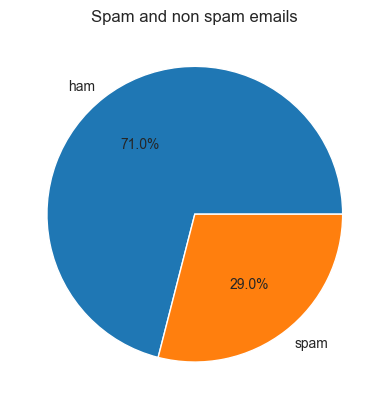

In [34]:
import matplotlib.pyplot as plt
label_count = data['label'].value_counts()
fig = plt.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%')
plt.title('Spam and non spam emails')
plt.show()

Text(0.5, 1.0, 'Text length')

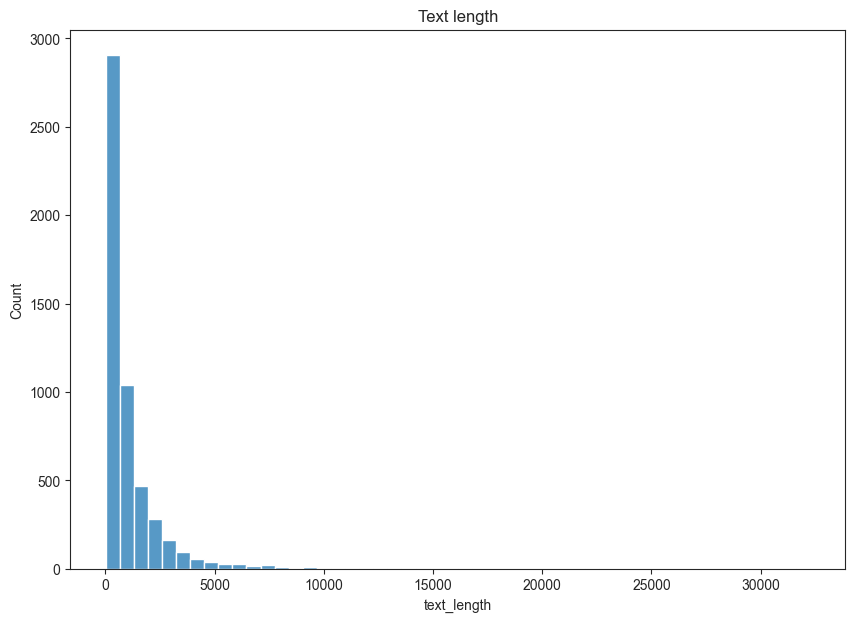

In [35]:
import seaborn as sns

data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 7))
sns.histplot(x='text_length', data=data, bins=50)
plt.title('Text length')

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfid = TfidfVectorizer(max_features = 3000)
X = tfid.fit_transform(data['text']).toarray()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data.category, test_size = 0.25)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('lr', LogisticRegression())
])

In [41]:
clf.fit(X_train, y_train)

Pipeline(steps=[('lr', LogisticRegression())])

In [42]:
clf.score(X_test, y_test)

0.9814385150812065

In [43]:
from sklearn.metrics import accuracy_score, precision_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [44]:
print('accuracy', accuracy)
print('precision', precision)

accuracy 0.9814385150812065
precision 0.9628712871287128


Text(0.5, 1.0, 'Confusion Matrix for Multinomial Classifier')

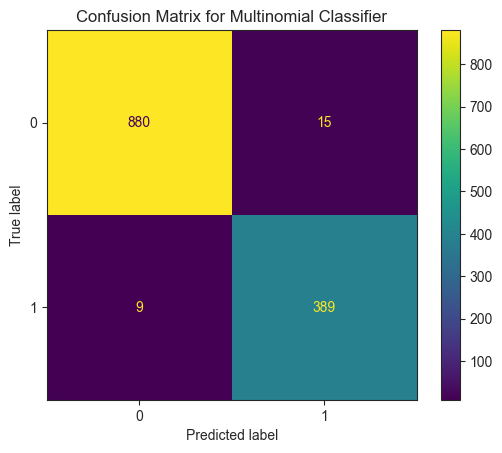

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.title("Confusion Matrix for Multinomial Classifier")

In [46]:
from ipywidgets import widgets

In [47]:
from ipywidgets import widgets

print('Enter email text below')
text_widget = widgets.Textarea(description='Email text', placeholder='Enter Email', layout=widgets.Layout(height="100%", width="auto"))
button_predict = widgets.Button( description='Predict' )
button_output = widgets.Output()

# pip install jupyterlab
# pip install jupyter_server
display(text_widget, button_predict, button_output)
def on_click_predict(b):
    with button_output:
        button_output.clear_output()
        user_input = tfid.transform([text_widget.value]).toarray()
        prediction = clf.predict(user_input)
        print('Email is spam' if prediction[0] == 1 else 'Email is NOT spam')

button_predict.on_click(on_click_predict)

Enter email text below


Textarea(value='', description='Email text', layout=Layout(height='100%', width='auto'), placeholder='Enter Em…

Button(description='Predict', style=ButtonStyle())

Output()